## **CS7290 Causal Modeling in Machine Learning: Homework 2**

In [12]:
#if installation of packages is requested

install.packages("bnlearn")
install.packages("BiocManager")
BiocManager::install("Rgraphviz")
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/lt/vyyrq6fs4f3g62dxdfflrg_40000gn/T//Rtmp7aZhPZ/downloaded_packages

The downloaded binary packages are in
	/var/folders/lt/vyyrq6fs4f3g62dxdfflrg_40000gn/T//Rtmp7aZhPZ/downloaded_packages


Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'Rgraphviz'




The downloaded binary packages are in
	/var/folders/lt/vyyrq6fs4f3g62dxdfflrg_40000gn/T//Rtmp7aZhPZ/downloaded_packages


Old packages: 'checkmate', 'cli', 'digest', 'dplyr', 'foreign', 'jsonlite',
  'knitr', 'lattice', 'mime', 'nlme', 'nnet', 'rlang', 'rstudioapi', 'stringi',
  'tinytex', 'uuid', 'vctrs', 'yaml'

also installing the dependencies ‘colorspace’, ‘ps’, ‘plyr’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘rematch’, ‘prettyunits’, ‘processx’, ‘generics’, ‘reshape2’, ‘DBI’, ‘gtable’, ‘lazyeval’, ‘scales’, ‘viridisLite’, ‘withr’, ‘clipr’, ‘cellranger’, ‘progress’, ‘callr’, ‘fs’, ‘whisker’, ‘lifecycle’, ‘broom’, ‘dbplyr’, ‘forcats’, ‘ggplot2’, ‘haven’, ‘hms’, ‘lubridate’, ‘modelr’, ‘readr’, ‘readxl’, ‘reprex’, ‘tidyr’





The downloaded binary packages are in
	/var/folders/lt/vyyrq6fs4f3g62dxdfflrg_40000gn/T//Rtmp7aZhPZ/downloaded_packages


In [6]:
library("bnlearn")
library("Rgraphviz")
library("tidyverse")


Attaching package: ‘bnlearn’


The following object is masked from ‘package:stats’:

    sigma


Loading required package: graph

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:bnlearn’:

    path, score


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowname

In [9]:
df = read.table("~/causalML/HW/hw2_release/survey.txt", header=TRUE)

In [10]:
dagstring = "[A][S][E|A:S][O|E][R|E][T|O:R]"
net = model2network(dagstring)

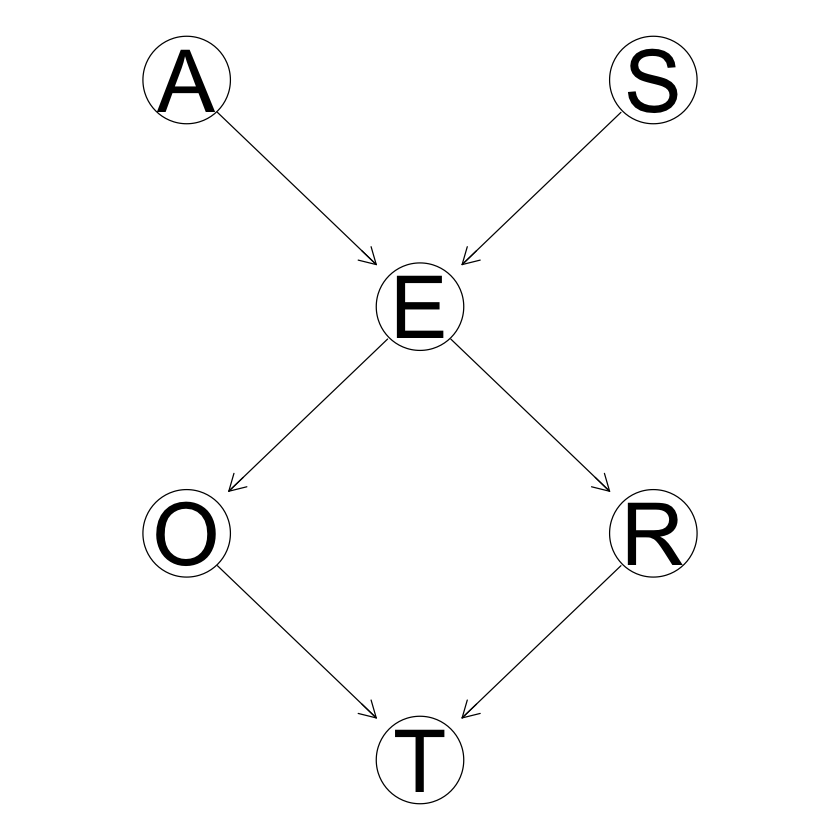

In [4]:
graphviz.plot(net)

In [11]:
# This is the same as the bnlearn's `dsep` function but
# avoids some type checking which would throw errors in this homework.
d_sep = bnlearn:::dseparation

In [12]:
d_sep(bn = net, x = 'A', y = 'E', z = c('R', 'T'))

[1] FALSE

In [13]:
append(list('A','E'), list(5,4))

[[1]]
[1] "A"

[[2]]
[1] "E"

[[3]]
[1] 5

[[4]]
[1] 4

In [14]:
vars = nodes(net)
pairs = combn(x = vars, 2, list)
arg_sets = list()
for(pair in pairs){
others = setdiff(vars, pair)
conditioning_sets = unlist(lapply(0:4, function(.x) combn(others, .x, list)), recursive = F)
for(set in conditioning_sets){
args = list(x = pair[1], y = pair[2], z = set)
arg_sets = c(arg_sets, list(args))
}
}

### **Question 1: D-separation and global Markov property assumption**

**1.a True d-separation statements (4 points)**

Create a new list. Iterate through the list of argument sets and evaluate if the d-separation statement is
true. If a statement is true, add it to the list. Show code. Print an element from the list and write out the
d-separation statement in English.

In [15]:
true_sep = list()
for(arg_set in arg_sets){
  if(isTRUE(d_sep(bn=net, x=arg_set$x, y=arg_set$y, z=arg_set$z))){
    true_sep = append(true_sep,list(arg_set))
  }
}

In [16]:
true_sep[4]

[[1]]
[[1]]$x
[1] "A"

[[1]]$y
[1] "O"

[[1]]$z
[1] "E" "T"

> This says that A is d-separated from O, given E and T.

**1.b Redundant d-separation statements (3 points)**

Given two d-separation statements A and B, if A implies B, then we can say B is a redundant statement.
This list is going to have some redundant statements. Print out an example of two elements in the list, where
one one element implies other element. Write both of them out as d-separation statements, and explain the
redundancy in plain English.

In [17]:
true_sep[1]

[[1]]
[[1]]$x
[1] "A"

[[1]]$y
[1] "O"

[[1]]$z
[1] "E"

In [18]:
true_sep[2]

[[1]]
[[1]]$x
[1] "A"

[[1]]$y
[1] "O"

[[1]]$z
[1] "E" "R"

> Statement 1: $ A \perp O | E $ ;
> Statement 2: $ A \perp O | E, R$   
> Statement 1 says A is d-separated from O given E. Since E blocks the path between A and O to begin with, adding node R to the set we condition on does not change the conditional independence given in statement 1.




**1.c Improve the brute-force algorithm for finding true d-separation statements (1 point)**

Based on this understanding of redundancy, how could this algorithm for finding true d-separation statements
be made more efficient?

> To make this algorithm more efficient, we could try and build the minimum conditioning set for each pair of variables. To do this, we could try finding one node that satisfies the d-separation criteria for each pair. Then we look at the pairs that don't have a conditioning set, and look at combinations of two nodes as a conditioning set, and move on to three if that doesn't work, and so on.

**1.d Conditional independence test on true d-separation statements (4 points)**

Evaluate the global Markov property assumption by doing a conditional independence test for each true d-separation statement. Print any test results where the p-value is not greater than .05.

In [19]:
for(i in true_sep){
  if(ci.test(i$x,i$y,i$z,df)$p.value < 0.05){
    print(ci.test(i$x,i$y,i$z,df))
  }
}


	Mutual Information (disc.)

data:  A ~ O | E + S
mi = 17.471, df = 8, p-value = 0.02556
alternative hypothesis: true value is greater than 0


	Mutual Information (disc.)

data:  A ~ R | E + O
mi = 16.029, df = 8, p-value = 0.04197
alternative hypothesis: true value is greater than 0


	Mutual Information (disc.)

data:  O ~ S | A + E
mi = 13.244, df = 6, p-value = 0.03932
alternative hypothesis: true value is greater than 0


	Mutual Information (disc.)

data:  O ~ S | E + T
mi = 14.202, df = 6, p-value = 0.02746
alternative hypothesis: true value is greater than 0


	Mutual Information (disc.)

data:  S ~ T | E + O
mi = 17.334, df = 8, p-value = 0.02681
alternative hypothesis: true value is greater than 0



**1.e Conditional independest test and non-redundant d-separation statements (1 point plus 2 points extra credit)**

What is apparent about these these printed statements with respect to whether or not the statement is redundant?



> All of these printed statements are redundant statements - they add nodes to the minimum conditioning set required between a pair of nodes to prove d-separation.

Extra credit (ask a statistician): Why might this issue with redundant statements be happening?

> Perphaps these redundant statements don't satisfy a conditional independence assumption because adding additional variables has the same effect as overfitting on a regression model. 
> 
>For example: given E, knowing about T doesn't give us any extra information about S. However, if we also add O into the mix, we might be getting enough data to learn more about the noise of S from this combination of variables. In essence, this is overfitting and will not generalize as well.

### **Question 2: Faithfulness assumption**

**2.a True conditional independence statements (4 points)**

A joint distribution $P_X$ is **faithful** to DAG $G$ if $A ⊥_{P_X} B|C ⇒ A ⊥_G B|C$ for all disjoint vertex set $A, B, C$. In other words, every true conditional independence statement about the joint distribution corresponds to a true d-separation statement in the DAG. Iterate through the arg_sets list again, run the conditional independence test for each argument set, creating a new list of sets where you conclude the conditional independence statement is true.


In [20]:
true_ci = list()
for(arg_set in arg_sets){
    if(ci.test(arg_set$x,arg_set$y,arg_set$z,df)$p.value >= 0.05){
      true_ci = append(true_ci, list(arg_set))
    }
  }

**2.b True conditional inpdendence statements among true d-separation statements (1 point)**

Combine that analysis with the analysis from previous questions. What is the proportion of true D-separation statements that are also true conditional independence statements?

In [21]:
i = 0
for(sep in true_sep){
  if(list(sep) %in% true_ci){
    i = i +1
  }
}

print(i/length(true_sep)*100)

[1] 91.80328


> Looks like 91% of true separation statements tend to be true conditional statements, which is a high proprtion. Only occasionally does redundancy pose a problem to conditional independence. So d-separation statements are a fairly reliable mechanism to help us identify conditonal independence statements.

#### 2.c True d-separation statements among true conditional inpdendence statements (1 point)
What is the proportion of true conditional independence statements that are also true-deseparation statements?

In [22]:
i = 0
for(ci in true_ci){
    if(list(ci) %in% true_sep){
        i=i+1 
    }
}
print(i/length(true_ci))

[1] 0.3353293


**2.d Results of non-redundant d-separation statements (1 point)**

How would these results change if we only considered non-redundant d-separation statements?


> It is likely that 100% of non-redundant d-separation statements would hold good as conditional independence assumptions (assuming a correct causal model).

**2.e Conclusion (1 point)**

Based on these results, how well do the faithfulness assumption and global Markov property assumption hold up with this DAG and dataset?

> Based on these results, the global Markov property holds up well, but the faithfulness assumption does not. Which means our DAG structure is valid to a good degree, but has not captured all the conditional independence relations that exist in the data.

### Question 3: Interventions as graph mutilation

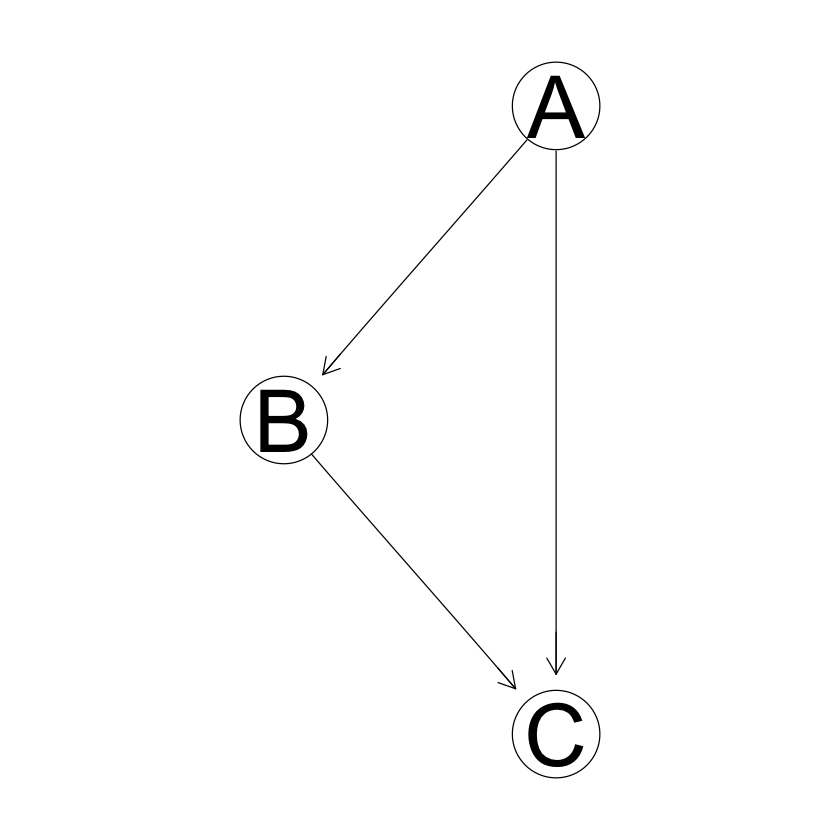

In [23]:
net = model2network('[A][B|A][C|B:A]')
nombres = c('off', 'on')
cptA = matrix(c(0.5, 0.5), ncol=2)
dimnames(cptA) = list(NULL, nombres)
cptB = matrix(c(.8, .2, .1, .9), ncol=2)
dimnames(cptB) = list(B = nombres, A = nombres)
cptC = matrix(c(.9, .1, .99, .01, .1, .9, .4, .6)) 
dim(cptC) = c(2, 2, 2)
dimnames(cptC) = list(C = nombres, A = nombres, B = nombres)
model = custom.fit(net, list(A = cptA, B = cptB, C = cptC))
graphviz.plot(model)

**3.a (3 points)**

Given this model, use Baye’s rule to calculate by hand P (A = on | B = on, C = on). Show work. 

> $P(A = on|B = on, C = on) = \frac{P(A = on, B = on, C = on)}{P(B = on, C = on)}\\
= \frac{P(A = on)P(B = on|A = on)P(C = on|A = on, B = on)}{\sum_A P(A)P(B = on|A)P(C = on|A, B = on)}\\
= \frac{0.5*0.9*0.6}{(0.5*0.9*0.6)+(0.5*0.2*0.9)}\\
= \frac{0.27}{0.36}\\
= 0.75 $

> Printing out CPTs to help calculation

In [59]:
model$A
model$B
model$C


  Parameters of node A (multinomial distribution)

Conditional probability table:
 
off  on 
0.5 0.5 


  Parameters of node B (multinomial distribution)

Conditional probability table:
 
     A
B     off  on
  off 0.8 0.1
  on  0.2 0.9


  Parameters of node C (multinomial distribution)

Conditional probability table:
 
, , B = off

     A
C      off   on
  off 0.90 0.99
  on  0.10 0.01

, , B = on

     A
C      off   on
  off 0.10 0.40
  on  0.90 0.60


**3.b (3 points)**

Estimate this probability using a rejection sampling inference algorithm. To do this, use the rbn function in bnlearn (use ?rbn to learn about it) to create a dataframe with a large number of sampled values from the model. Remove the rows where B and C are not both ‘on’. Estimate the P(A = on | B = on,C = on) as the proportion of rows where A == ‘on’. (Pro tip: Try the filter function in the package dplyr).

In [25]:
newdf = rbn(model, n=2000) %>% filter(B=='on' & C=='on') 
nrow(filter(newdf, A=='on'))/nrow(newdf)

[1] 0.7516779

#### 3.c (1 point)

Use mutilated to create a new graph under the intervention do(B = on). Plot the new graph.

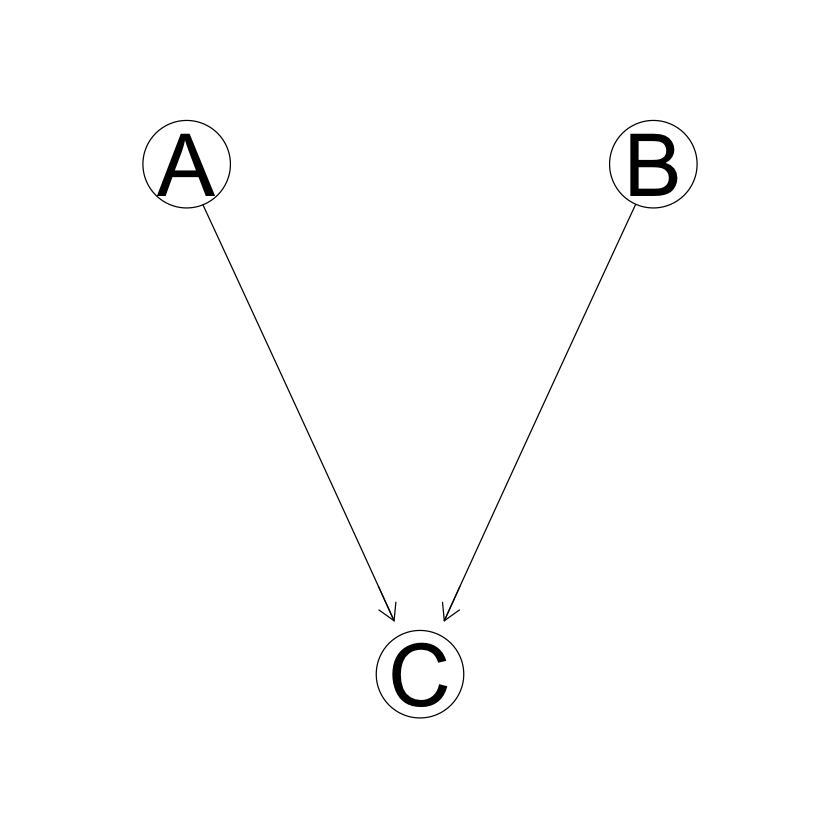

In [28]:
mutilated_model = mutilated(model, evidence = list(B="on"))
graphviz.plot(mutilated_model)

#### 3.d (3 points)
As in problem 3.1, use Baye’s rule to calculate by hand P (A = on | do(B = on), C = on). Show work.

> $P(A = on|do(B = on), C = on) = \frac{P(A = on, B = on, C = on)}{P(B = on, C = on)}\\
= \frac{P(A = on)P(B = on|A = on)P(C = on|A = on, B = on)}{\sum_A P(A)P(B = on|A)P(C = on|A, B = on)}\\
= \frac{0.5*1*0.6}{(0.5*1*0.6)+(0.5*1*0.9)}\\
= \frac{0.3}{0.75}\\
= 0.4 $

#### 3.e (2 points)
Use the rejection sampling inference procedure you used to estimate P (A = on | B = on, C = on) to now estimate P(A = on | do(B = on),C = on).

In [29]:
newdf1 = rbn(mutilated_model, n=2000) %>% filter(C=='on')
(newdf1 %>% filter(A=='on') %>% nrow)/(newdf1 %>% nrow)

[1] 0.4037559

#### 4.h (6 points)

Implement this model in pyro. Then calculate P(A = on | B = on,C = on) and P(A = on | do(B = on), C = on) use the condition and do operators and an inference algorthm.

In [43]:
#Pyro imports

import matplotlib.pyplot as plt
import numpy as np
import torch
import pyro
import pyro.distributions as dist

pyro.set_rng_seed(101)

In [44]:
#Creating model

def bn():
    A = pyro.sample("A", dist.Categorical(torch.tensor([0.5,0.5])))
    B_probs = torch.tensor([[0.8,0.2],[0.1,0.9]])
    B = pyro.sample("B", dist.Categorical(B_probs[A]))
    C_probs = torch.tensor([[[0.9,0.1],[0.99,0.01]],[[0.1,0.9],[0.4,0.6]]])
    C = pyro.sample("C", dist.Categorical(C_probs[B][A]))

In [45]:
#Conditioning model on B=on, C=on

conditioned_bn = pyro.condition(bn, data={'B':torch.tensor(1), 'C':torch.tensor(1)})

In [46]:
#Inferring A from conditioned

posterior = pyro.infer.Importance(conditioned_bn, num_samples=1000).run()
marginal = pyro.infer.EmpiricalMarginal(posterior, "A")
A_samples = np.array([marginal().item() for _ in range(1000)])
A_unique, A_counts = np.unique(A_samples,return_counts=True)

$P(A = on|B = on, C = on)$

In [47]:
A_counts[1]/sum(A_counts)

0.732

In [49]:
new_bn = pyro.condition(pyro.do(bn, data={"B":torch.tensor(1)}), data={"C":torch.tensor(1)})

In [50]:
#Inferring A from intervened model

posterior_int = pyro.infer.Importance(new_bn, num_samples=1000).run()
marginal_int = pyro.infer.EmpiricalMarginal(posterior_int, "A")
A_samples_int = np.array([marginal_int().item() for _ in range(1000)])
A_unique_int, A_counts_int = np.unique(A_samples_int,return_counts=True)

$P(A = on|do(B = on), C = on)$

In [51]:
A_counts_int[1]/sum(A_counts_int)

0.407